In [49]:
from google.cloud import bigquery as bq
from google.auth import compute_engine
from pandas.io import gbq
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [50]:
# client = bq.Client()
# dataset_ref = client.dataset('tcga_201607_beta', project='p1rcc-aqua')
# table_ref = dataset_ref.table('mRNA_KIRP')
# table = client.get_table(table_ref)

In [51]:
# client = bq.Client()
# qString = "SELECT * FROM `p1rcc-aqua.tcga_201607_beta.mRNA_KIRP`"
# df = client.query(qString).result().to_dataframe()
# df.head(5)
# df.info()

### Query mRNA data

In [52]:
mRNA_q = "SELECT ParticipantBarcode, original_gene_symbol, normalized_count FROM `tcga_201607_beta.mRNA_KIRP`"
mRNA_df = pd.read_gbq(mRNA_q, 'p1rcc-aqua', dialect='standard')

In [53]:
mRNA_df = mRNA_df.dropna().drop_duplicates(subset=['ParticipantBarcode', 'original_gene_symbol'], keep=False)

In [54]:
mRNA_data = mRNA_df.pivot('ParticipantBarcode', 'original_gene_symbol', 'normalized_count')
mRNA_data = mRNA_data.reset_index()

In [55]:
mRNA_data.head()

original_gene_symbol,ParticipantBarcode,A1BG,A1CF,A2BP1,A2LD1,A2M,A2ML1,A4GALT,A4GNT,AAA1,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,TCGA-2K-A9WE,201.3304,4.1094,0.5137,81.9109,20899.5608,0.0,1326.8268,13.8693,0.0,...,27.2249,180.3005,1247.2069,2.0547,760.2414,8844.9981,1509.1820,978.0403,270.1939,0.0
1,TCGA-2Z-A9J1,34.1519,37.1701,0.0000,122.4433,5456.0922,0.0,2339.2393,7.9296,0.0,...,29.2405,172.4693,968.9010,1.4868,511.9564,6207.4092,1299.4672,359.3111,366.2495,0.0
2,TCGA-2Z-A9J2,45.8403,17.3450,0.0000,184.9223,4954.3084,0.0,976.2745,0.0000,0.0,...,26.0175,138.7598,854.8597,1.2389,402.6513,7059.4066,794.1523,345.6607,551.3226,0.0
3,TCGA-2Z-A9J3,26.0224,10.1339,11.9435,187.0069,1151.2088,0.0,1001.8096,39.0879,0.0,...,31.1256,167.2096,1302.9316,0.0000,456.7499,8500.1810,1104.9584,632.6457,0.3619,0.0
4,TCGA-2Z-A9J5,255.3725,36.8627,3.1373,118.8157,13154.1333,0.0,1324.7059,6.2745,0.0,...,11.7647,120.7843,847.8431,2.3529,447.8431,5661.9608,1138.8235,481.5686,312.9412,0.0


### Query Clinical Data

In [62]:
clin_data_q = "SELECT * FROM `tcga_201607_beta.clin_data_KIRP`"
clin_data_KIRP = pd.read_gbq(clin_data_q, 'p1rcc-aqua', dialect='standard')

In [63]:
# # for now, use csv
# clin_data = pd.read_csv("data1.csv")
# clin_data_KIRP = clin_data[clin_data['Study'] == "KIRP"]

### Combine mRNA and Clinical Data

In [64]:
df_all = mRNA_data.merge(clin_data_KIRP, left_on="ParticipantBarcode", right_on="ParticipantBarcode", how="left")

In [65]:
df_all.head()

,ParticipantBarcode,A1BG,A1CF,A2BP1,A2LD1,A2M,A2ML1,A4GALT,A4GNT,AAA1,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
0,TCGA-2K-A9WE,201.3304,4.1094,0.5137,81.9109,20899.5608,0.0,1326.8268,13.8693,0.0,...,27.7,None,None,No,None,None,None,None,None,None
1,TCGA-2Z-A9J1,34.1519,37.1701,0.0000,122.4433,5456.0922,0.0,2339.2393,7.9296,0.0,...,29.6,None,None,No,None,None,None,None,None,None
2,TCGA-2Z-A9J2,45.8403,17.3450,0.0000,184.9223,4954.3084,0.0,976.2745,0.0000,0.0,...,23.6,None,None,No,None,None,None,1983,None,None
3,TCGA-2Z-A9J3,26.0224,10.1339,11.9435,187.0069,1151.2088,0.0,1001.8096,39.0879,0.0,...,26.6,None,None,No,None,None,None,None,None,1959
4,TCGA-2Z-A9J5,255.3725,36.8627,3.1373,118.8157,13154.1333,0.0,1324.7059,6.2745,0.0,...,35.8,None,None,No,None,None,None,None,None,None


### Functions to Plot

In [69]:
gene_name = 'MET'
color_by = "age_at_initial_pathologic_diagnosis"

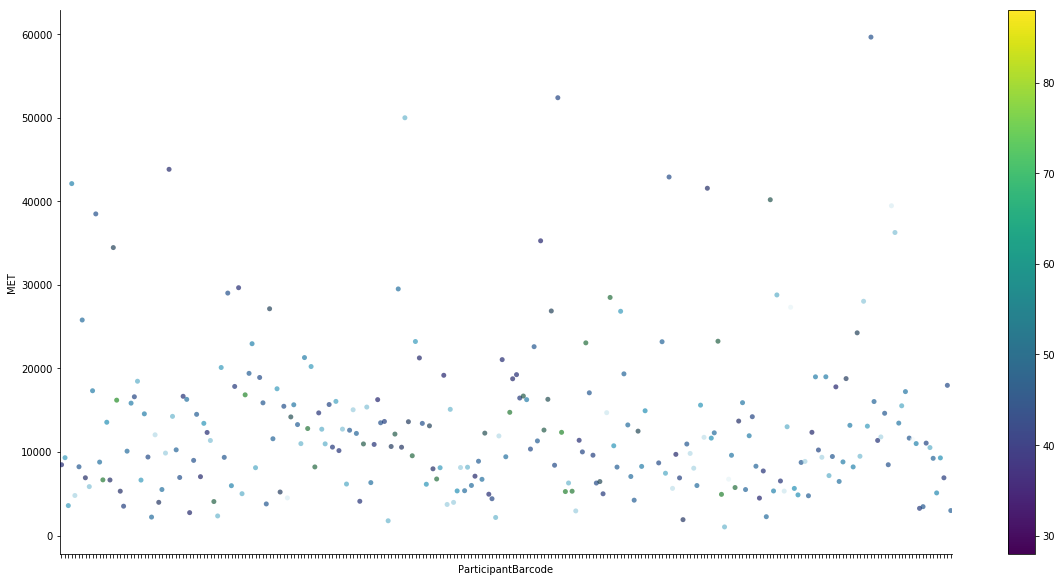

In [70]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

plt.figure(figsize=(20,10))
ax = sns.stripplot(x='ParticipantBarcode', y=gene_name, hue=color_by, data=df_all, palette='ocean', jitter=True, edgecolor='none', alpha=.60)
ax.legend_.remove()
ax.set(xticklabels=[])
sns.despine()
df_all.describe()

# Drawing the side color bar
normalize = mcolors.Normalize(vmin=df_all[color_by].min(), vmax=df_all[color_by].max())
colormap = cm.viridis

for n in df_all[color_by]:
    plt.plot(color=colormap(normalize(n)))

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(df_all[color_by])
plt.colorbar(scalarmappaple)

## Barplot of gene expression across patients

### Insert gene name and variable to color by below

In [232]:
gene_name = "MET"
# color_by = "age_at_initial_pathologic_diagnosis"
color_by = "tumor_type"

TypeError: You must first set_array for mappable

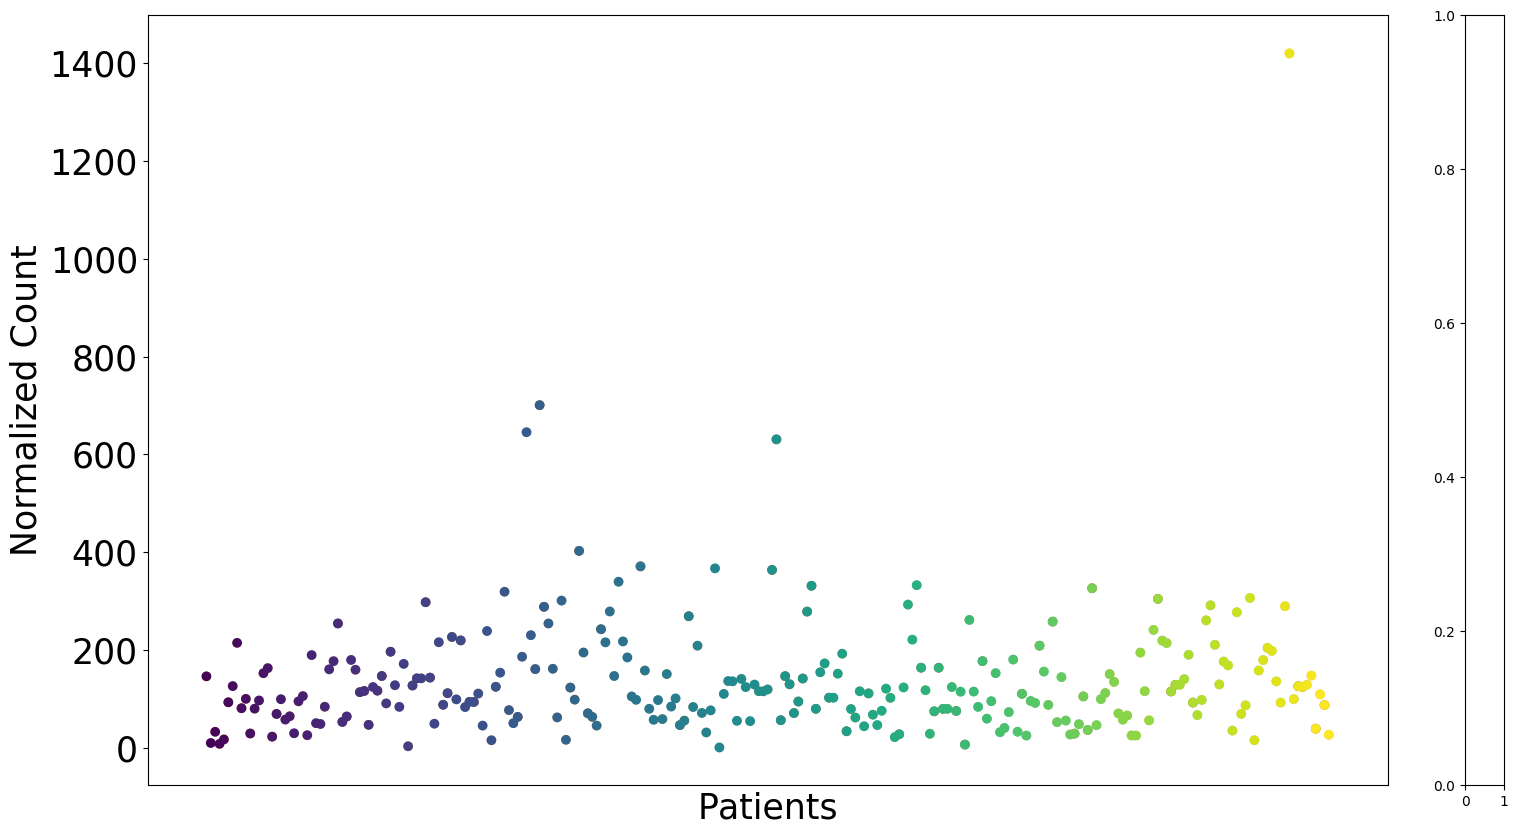

In [233]:
if df_all[color_by].dtype == 'O':
    plot_1gene_cat_color()
else:
    plot_1gene_cont_color()

In [185]:
df_all[gene_name].describe()

count     257.000000
mean      137.694999
std       127.874369
min         0.595500
25%        67.645100
50%       111.927200
75%       168.533200
max      1419.736200
Name: TTN, dtype: float64

In [94]:
# # query database
# query = 'SELECT * FROM tcga_201607_beta.mRNA_KIRP WHERE HGNC_gene_symbol = "' + gene_name + '"'
# df = gbq.read_gbq(query, project_id='p1rcc-aqua')

In [100]:
# # plot
# plt.figure(figsize=(20,10))
# ax = plt.subplot() # Defines ax variable by creating an empty plot
# for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
#              ax.get_xticklabels() + ax.get_yticklabels()):
#     item.set_fontsize(25)

# plt.bar(df['ParticipantBarcode'],df['normalized_count'])
# plt.xticks([])
# plt.xlabel("Patients")
# plt.ylabel("Normalized Count")
# ax.set_title(gene_name + " gene expression", fontsize=30)
# plt.show()

## Scatter plot to compare gene expressions for 2 genes

### Insert gene names below

In [77]:
gene_name1 = "NFE2L2"
gene_name2 = "MET"

In [68]:
from scipy import stats
stats.spearmanr(df_all[gene_name1], df_all[gene_name2])

NameError: name 'gene_name1' is not defined

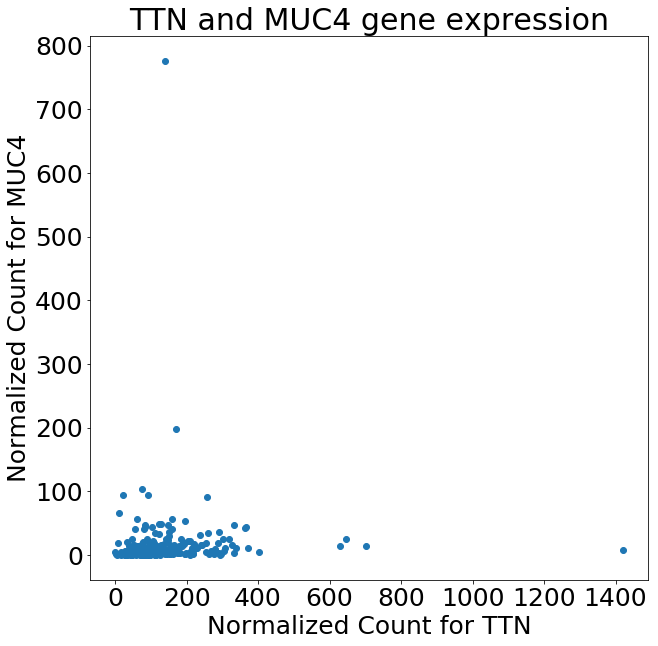

In [102]:
plt.figure(figsize=(10,10))
ax = plt.subplot() # Defines ax variable by creating an empty plot
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(25)
plt.scatter(all_data[gene_name1],all_data[gene_name2])
plt.xlabel("Normalized Count for " + gene_name1)
plt.ylabel("Normalized Count for " + gene_name2)
ax.set_title(gene_name1 + " and " + gene_name2 + " gene expression", fontsize=30)
plt.show()

In [83]:
# query1 = 'SELECT * FROM tcga_201607_beta.mRNA_KIRP WHERE HGNC_gene_symbol = "' + gene_name1 + '"'
# df1 = gbq.read_gbq(query1, project_id='p1rcc-aqua')
# query2 = 'SELECT * FROM tcga_201607_beta.mRNA_KIRP WHERE HGNC_gene_symbol = "' + gene_name2 + '"'
# df2 = gbq.read_gbq(query2, project_id='p1rcc-aqua')

In [84]:
# df = df1.merge(df2, left_on="ParticipantBarcode", right_on="ParticipantBarcode", how="left")

In [101]:
# plt.figure(figsize=(10,10))
# ax = plt.subplot() # Defines ax variable by creating an empty plot
# for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
#              ax.get_xticklabels() + ax.get_yticklabels()):
#     item.set_fontsize(25)
# plt.scatter(df['normalized_count_x'],df['normalized_count_y'])
# plt.xlabel("Normalized Count for " + gene_name1)
# plt.ylabel("Normalized Count for " + gene_name2)
# ax.set_title(gene_name1 + " and " + gene_name2 + " gene expression", fontsize=30)
# plt.show()

## Scatter plot to compare gene expressions for 2 genes colored by another variable from clinical data table

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.subplot() # Defines ax variable by creating an empty plot
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(25)
plt.scatter(all_data[gene_name1],all_data[gene_name2])
plt.xlabel("Normalized Count for " + gene_name1)
plt.ylabel("Normalized Count for " + gene_name2)
ax.set_title(gene_name1 + " and " + gene_name2 + " gene expression", fontsize=30)
plt.show()

In [64]:
import pandas as pd
clin_data = pd.read_csv("data1.csv")

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13,28,29,34,49,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [65]:
clin_data = pd.read_csv("data1.csv")
clin_data_KIRP = clin_data[clin_data['Study'] == "KIRP"]

In [66]:
clin_data_KIRP.head()

,ParticipantBarcode,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
8003,TCGA-2K-A9WE,KIRP,TCGA,73292C19-D6A8-4BC4-97BC-CCCE54F264F8,2K,53.0,NaN,398,Nationwide Children's Hospital,M0,...,27.7,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
8004,TCGA-2Z-A9JE,KIRP,TCGA,C20B1007-0111-4EF6-9DF5-14DA6094FCA1,2Z,59.0,NaN,432,Nationwide Children's Hospital,M0,...,26.6,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
8005,TCGA-2Z-A9JL,KIRP,TCGA,F9C593D1-F204-4026-8A9B-A6AF0922C885,2Z,47.0,NaN,432,Nationwide Children's Hospital,M0,...,25.6,NaN,NaN,"Yes, History of Synchronous/Bilateral Malignancy",Kidney,"Other, specify",Synchronous Malignancy,2007.0,NaN,NaN
8006,TCGA-2Z-A9JD,KIRP,TCGA,CFF68090-09DF-492B-874C-0CAEB29F9361,2Z,66.0,NaN,432,Nationwide Children's Hospital,M0,...,43.4,NaN,NaN,"Yes, History of Prior Malignancy",Kidney,Clear Cell Adenocarcinoma,Prior Malignancy,1981.0,NaN,1961.0
8007,TCGA-2Z-A9JI,KIRP,TCGA,3ABD0691-F575-44CE-A13E-8F6BCEB8CABF,2Z,38.0,NaN,432,Nationwide Children's Hospital,M0,...,27.7,NaN,NaN,No,NaN,NaN,NaN,2007.0,NaN,1984.0


In [86]:
df_all = df.merge(clin_data_KIRP, left_on="ParticipantBarcode", right_on="ParticipantBarcode", how="left")

In [87]:
df_all.head()

,int64_field_0_x,ParticipantBarcode,SampleBarcode_x,AliquotBarcode_x,Study_x,SampleTypeLetterCode_x,Platform_x,original_gene_symbol_x,HGNC_gene_symbol_x,gene_id_x,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
0,450786,TCGA-BQ-5879,TCGA-BQ-5879-11A,TCGA-BQ-5879-11A-01R-1592-07,KIRP,NT,IlluminaHiSeq,TTN,TTN,7273,...,33.8,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
1,450786,TCGA-BQ-5879,TCGA-BQ-5879-11A,TCGA-BQ-5879-11A-01R-1592-07,KIRP,NT,IlluminaHiSeq,TTN,TTN,7273,...,33.8,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
2,589608,TCGA-BQ-5890,TCGA-BQ-5890-11A,TCGA-BQ-5890-11A-01R-1592-07,KIRP,NT,IlluminaHiSeq,TTN,TTN,7273,...,25.8,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
3,589608,TCGA-BQ-5890,TCGA-BQ-5890-11A,TCGA-BQ-5890-11A-01R-1592-07,KIRP,NT,IlluminaHiSeq,TTN,TTN,7273,...,25.8,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
4,4368750,TCGA-BQ-7044,TCGA-BQ-7044-11A,TCGA-BQ-7044-11A-01R-1965-07,KIRP,NT,IlluminaHiSeq,TTN,TTN,7273,...,28.3,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


ValueError: c of shape (389,) not acceptable as a color sequence for x with size 389, y with size 389

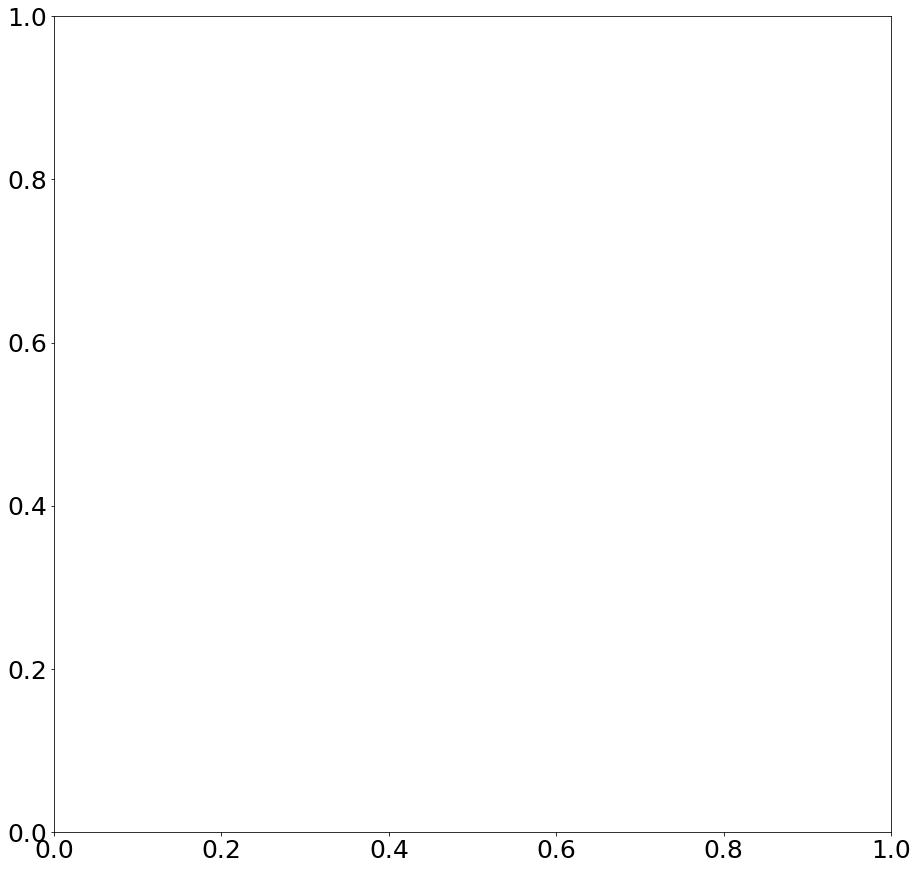

In [90]:
plt.figure(figsize=(15,15))
ax = plt.subplot() # Defines ax variable by creating an empty plot
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(25)
plt.scatter(df_all['normalized_count_x'],df_all['normalized_count_y'], c=df_all['gender'], alpha=0.2)
plt.xlabel("Normalized Count for " + gene_name1)
plt.ylabel("Normalized Count for " + gene_name2)
cbar=plt.colorbar()
cbar.set_label("Gender")
ax.set_title(gene_name1 + " and " + gene_name2 + " gene expression colored by gender", fontsize=30)
plt.show()